In [0]:
import pandas as pd
import numpy as np

In [0]:
!pip3 install tensorflow==1.15

In [0]:
df_inflation = pd.read_csv('IFS_03-14-2020 16-11-47-72_timeSeries.csv')
df_gdp = pd.read_csv('IFS_04-07-2020 12-20-28-26_timeSeries.csv')

In [4]:
df_inflation.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Attribute,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,...,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2,Base Year,Unnamed: 248
0,"China, P.R.: Mainland",924,"Prices, Consumer Price Index, All items, Perce...",PCPI_PC_PP_PT,Value,1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,-1.199986,-0.500009,0.099990,0.900010,0.299996,-0.200001,0.100003,0.299991,1.100008,-1.300002,-0.299990,-0.300002,-0.900003,-0.700002,0.299996,1.000000,0.200001,-0.100007,...,1.072125,-0.192864,-0.289855,0.000000,0.096899,-0.193611,-0.096993,0.485437,0.579710,0.096061,0.000000,0.287908,0.669856,1.235741,-1.126761,-0.189934,-0.190295,0.000000,0.285987,0.665399,0.661001,0.187617,-0.374532,0.093985,0.469484,1.028037,-0.370028,0.092851,0.000000,-0.092764,0.371402,0.740056,0.826446,0.910747,0.361011,0.000000,1.438849,NaN,NaN,NaN
1,"Belarus, Rep. of",913,"Prices, Consumer Price Index, All items, Perce...",PCPI_PC_PP_PT,Value,14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,4.800000,3.816794,3.952206,3.271441,2.654110,2.085071,1.633987,0.723473,2.075020,3.596560,4.528302,5.487365,6.100000,3.581527,2.547771,2.928128,2.241379,1.349073,1.164725,1.151316,1.138211,1.688103,3.241107,...,0.870000,0.535343,0.276107,0.658865,0.283314,0.711154,-0.106404,-0.794035,0.253782,1.197546,0.452184,0.172397,0.750000,0.913151,0.777024,0.292797,-0.282211,0.429394,-0.155476,0.126521,0.806765,0.511040,0.556408,0.782293,0.880000,1.338224,0.381493,0.038979,0.331190,-0.058252,0.194288,-0.232693,0.456754,0.541743,0.230925,0.537583,0.860000,NaN,NaN,NaN
2,"Tajikistan, Rep. of",923,"Prices, Consumer Price Index, All items, Perce...",PCPI_PC_PP_PT,Value,NaN,0.800000,2.400000,3.300000,5.900000,1.700000,0.200000,5.900000,7.500000,12.400000,7.700000,-0.300000,2.400000,1.200000,1.300000,2.100000,2.000000,-0.800000,-0.200000,-0.900000,-0.300000,1.000000,1.800000,2.300000,1.600000,0.900000,0.400000,3.100000,0.400000,-0.700000,0.800000,0.500000,2.900000,0.400000,0.600000,...,0.600000,1.124764,1.500188,1.200000,0.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Azerbaijan, Rep. of",912,"Prices, Consumer Price Index, All items, Perce...",PCPI_PC_PP_PT,Value,0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,0.327930,0.577859,0.277551,0.192262,-0.532763,-0.375475,-0.833657,-0.528164,0.483648,0.565807,0.324510,0.878021,0.639031,0.443672,0.396099,0.945696,0.489083,-1.018483,-0.424372,-0.552050,0.450263,0.614845,0.727277,...,2.320857,1.622746,1.594970,0.238658,0.171032,-1.035063,0.111020,0.199216,0.729418,1.102993,0.181123,0.092961,0.014515,0.154629,0.206745,-0.204086,-0.032774,-0.658192,-0.591018,0.863519,0.248491,0.163502,0.581491,0.785682,0.190598,0.563878,0.606804,0.383925,-0.430774,-0.467068,0.054304,-0.319731,0.346839,0.416770,0.463842,0.536374,0.566053,NaN,NaN,NaN
4,Vietnam,582,"Prices, Consumer Price Index, All items, Perce...",PCPI_PC_PP_PT,Value,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,0.250836,0.417014,-0.747508,-0.502092,-0.168209,0.000000,-0.168492,0.000000,0.506329,-0.167926,0.252313,0.838926,1.106530,2.241594,-0.852619,0.000000,0.368550,0.122399,-0.122249,0.122399,0.122249,0.366300,0.243309,...,0.456400,0

In [5]:
df_gdp.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       'Attribute', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', 'Base Year', 'Unnamed: 25'],
      dtype='object')

In [0]:
df_inflation.drop(columns=['Base Year', 'Unnamed: 248'], inplace=True)
df_gdp.drop(columns=['Base Year', 'Unnamed: 25'], inplace=True)

## Take on only Armenia values

In [0]:
df_armenia = df[df['Country Name'].str.contains('Armenia')]
df_armenia.drop(columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Attribute'], inplace=True)

In [0]:
len(df_armenia.columns)

244

In [0]:
df_armenia

,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,2003M4,...,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2,Base Year,Unnamed: 248
156,1.882147,0.120668,-0.39357,-0.812643,-0.316162,-0.294022,-1.970415,-1.28604,0.258496,-0.013654,0.883242,2.409684,4.624233,-0.936777,0.016011,-0.090948,1.614929,-1.333605,-2.705763,-0.688128,-1.174225,0.086103,1.206852,2.420329,2.219259,-0.725348,-0.617413,2.530108,1.695025,-0.517488,-4.952707,-3.032013,-0.635878,0.510183,2.229309,3.582454,4.132248,-1.540265,-0.45123,2.046984,...,2.602985,-0.880643,-0.309745,0.980565,-0.246264,-0.947245,-2.575306,-0.394277,0.150221,0.798093,1.978092,1.537581,2.844461,-0.475751,0.127133,-0.33717,-1.039515,-1.611476,-1.175433,0.578345,0.343104,0.122085,1.003735,1.481059,1.833866,0.617026,0.110924,-0.073714,-0.443939,-1.909741,-1.943956,-0.441296,0.195058,0.550208,1.051402,1.252837,1.377329,-0.20318,NaN,NaN


In [0]:
new_df = pd.DataFrame({'Inflation':df_armenia.values[0]})

In [0]:
new_df

,Inflation
0,1.882147
1,0.120668
2,-0.393570
3,-0.812643
4,-0.316162
...,...
239,1.252837
240,1.377329
241,-0.203180
242,NaN


In [0]:
train_armenia = new_df[:int(0.6*(len(new_df)))]
val_armenia = new_df[int(0.6*(len(new_df))):int(0.8*(len(new_df)))]
test_armenia = new_df[int(0.8*(len(new_df))):]

In [0]:
train_armenia

,Inflation
0,1.882147
1,0.120668
2,-0.393570
3,-0.812643
4,-0.316162
...,...
141,0.336123
142,1.174566
143,2.508480
144,3.563135


In [0]:
!pip3 install pyramid-arima

     |████████████████████████████████| 604kB 57.8MB/s 


In [0]:
import matplotlib.pyplot as plt

## Auto-ARIMA model

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=549.304, BIC=567.206, Fit time=0.353 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=592.178, BIC=598.145, Fit time=0.011 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=568.857, BIC=577.808, Fit time=0.028 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=558.665, BIC=567.616, Fit time=0.034 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=551.675, BIC=566.593, Fit time=0.202 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=549.695, BIC=570.580, Fit time=0.257 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=560.858, BIC=575.776, Fit time=0.097 seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=556.797, BIC=577.682, Fit time=0.379 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=560.665, BIC=572.600, Fit time=0.050 seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(0, 0, 0, 1);

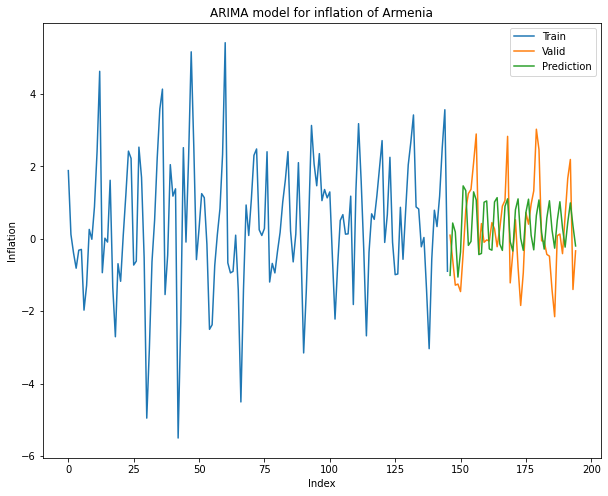

In [0]:
from pyramid.arima import auto_arima
model = auto_arima(train_armenia, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train_armenia)

forecast = model.predict(n_periods=len(val_armenia))
forecast = pd.DataFrame(forecast,index = val_armenia.index,columns=['Prediction'])

#plot the predictions for validation set
plt.figure(figsize=(10, 8))
plt.plot(train_armenia, label='Train')
plt.plot(val_armenia, label='Valid')
plt.plot(forecast, label='Prediction')
plt.xlabel('Index')
plt.ylabel('Inflation')
plt.title('ARIMA model for inflation of Armenia')
plt.legend()
plt.show()

In [0]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
rms = sqrt(mean_squared_error(val_armenia, forecast))
print('RMSE:', rms)
mse = mean_squared_error(val_armenia, forecast)
print('MSE:', mse)
mae = mean_absolute_error(val_armenia, forecast)
print('MAE:', mae)

RMSE: 1.1646022341722286
MSE: 1.3562983638389463
MAE: 0.9979616637290145


In [0]:
len(df['Country Code'].unique()), len(df['Country Code'])

(179, 179)

In [0]:
#pd.concat([df_inflation, df_gdp]).columns

In [0]:
df_inflation.drop(columns=['Country Name', 'Indicator Name', 'Indicator Code', 'Attribute'], inplace=True)
df_gdp.drop(columns=['Country Name', 'Indicator Name', 'Indicator Code', 'Attribute'], inplace=True)

In [8]:
df_inflation.head()

,Country Code,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,...,2016M11,2016M12,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2
0,924,1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,-1.199986,-0.500009,0.099990,0.900010,0.299996,-0.200001,0.100003,0.299991,1.100008,-1.300002,-0.299990,-0.300002,-0.900003,-0.700002,0.299996,1.000000,0.200001,-0.100007,0.300008,1.099995,0.900005,-0.600011,...,0.097752,0.195312,1.072125,-0.192864,-0.289855,0.000000,0.096899,-0.193611,-0.096993,0.485437,0.579710,0.096061,0.000000,0.287908,0.669856,1.235741,-1.126761,-0.189934,-0.190295,0.000000,0.285987,0.665399,0.661001,0.187617,-0.374532,0.093985,0.469484,1.028037,-0.370028,0.092851,0.000000,-0.092764,0.371402,0.740056,0.826446,0.910747,0.361011,0.000000,1.438849,NaN
1,913,14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,4.800000,3.816794,3.952206,3.271441,2.654110,2.085071,1.633987,0.723473,2.075020,3.596560,4.528302,5.487365,6.100000,3.581527,2.547771,2.928128,2.241379,1.349073,1.164725,1.151316,1.138211,1.688103,3.241107,3.215926,4.300000,1.821668,1.789077,...,0.787618,0.481599,0.870000,0.535343,0.276107,0.658865,0.283314,0.711154,-0.106404,-0.794035,0.253782,1.197546,0.452184,0.172397,0.750000,0.913151,0.777024,0.292797,-0.282211,0.429394,-0.155476,0.126521,0.806765,0.511040,0.556408,0.782293,0.880000,1.338224,0.381493,0.038979,0.331190,-0.058252,0.194288,-0.232693,0.456754,0.541743,0.230925,0.537583,0.860000,NaN
2,923,NaN,0.800000,2.400000,3.300000,5.900000,1.700000,0.200000,5.900000,7.500000,12.400000,7.700000,-0.300000,2.400000,1.200000,1.300000,2.100000,2.000000,-0.800000,-0.200000,-0.900000,-0.300000,1.000000,1.800000,2.300000,1.600000,0.900000,0.400000,3.100000,0.400000,-0.700000,0.800000,0.500000,2.900000,0.400000,0.600000,2.800000,3.700000,1.500000,2.500000,...,0.600000,0.300000,0.600000,1.124764,1.500188,1.200000,0.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,912,0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,0.327930,0.577859,0.277551,0.192262,-0.532763,-0.375475,-0.833657,-0.528164,0.483648,0.565807,0.324510,0.878021,0.639031,0.443672,0.396099,0.945696,0.489083,-1.018483,-0.424372,-0.552050,0.450263,0.614845,0.727277,0.600498,0.305125,0.139133,0.045657,...,1.666656,3.042429,2.320857,1.622746,1.594970,0.238658,0.171032,-1.035063,0.111020,0.199216,0.729418,1.102993,0.181123,0.092961,0.014515,0.154629,0.206745,-0.204086,-0.032774,-0.658192,-0.591018,0.863519,0.248491,0.163502,0.581491,0.785682,0.190598,0.563878,0.606804,0.383925,-0.430774,-0.467068,0.054304,-0.319731,0.346839,0.416770,0.463842,0.536374,0.566053,NaN
4,582,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,0.250836,0.417014,-0.747508,-0.502092,-0.168209,0.000000,-0.168492,0.000000,0.506329,-0.167926,0.252313,0.838926,1.106530,2.241594,-0.852619,0.000000,0.368550,0.122399,-0.122249,0.122399,0.122249,0.366300,0.243309,0.364078,0.846433,2.158273,-0.586854,...,0.480700,0.227500,0.456400,0.233800,0.208000,0.003200,-0.527443,-0.171100,0.109700,0.917200,0.592100,0.413600,0.131500,0.206400,0.504850,0.730264,-0.266128,0.082812,0.542429,0.612361,-0.090600,0.452100,0.593500,0.331600,-0.288400,-0.253700,0.098200,0.801600,-0.209600,0.3097

In [9]:
df_inflation.shape

(179, 243)

In [0]:
df_gdp.head()

,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,962,-4.611992e+09,-1.850745e+09,-2.945402e+09,-3.258186e+09,-1.744191e+09,-5.382675e+09,-1.341598e+09,-1.740887e+10,-5.015379e+09,-2.948725e+09,-5.782850e+09,-8.701471e+09,-8.416607e+09,-1.303184e+10,-9.866119e+09,NaN,NaN,NaN,NaN
2,534,-2.273300e+11,-2.006800e+11,-1.669000e+11,-2.070800e+11,-2.237500e+11,-2.611600e+11,-3.323400e+11,-2.051200e+11,-3.292300e+11,-3.800000e+11,-8.180700e+11,-7.682400e+11,-1.167660e+12,-1.398840e+12,-1.474300e+12,-1.597800e+12,-1.896000e+12,NaN,NaN
4,738,-6.669900e+10,-3.893900e+10,-1.383173e+12,-3.045726e+12,-4.910258e+12,-1.800000e+08,3.637930e+10,6.475378e+10,3.376268e+10,9.819843e+10,1.064698e+11,1.319467e+11,-1.580834e+10,-1.375702e+11,-1.975099e+11,NaN,NaN,NaN,NaN
5,223,-3.453164e+10,-4.272025e+10,-4.994598e+10,-5.451812e+10,-5.783920e+10,-6.274438e+10,-6.029358e+10,-5.778067e+10,-7.625354e+10,-7.375176e+10,-1.200347e+11,-1.124597e+11,-1.201301e+11,-7.408375e+10,-1.076870e+11,-1.128223e+11,-1.330063e+11,-1.231159e+11,-1.947905e+11
7,144,2.620822e+12,2.655451e+12,2.658820e+12,2.743232e+12,2.695678e+12,2.974949e+12,3.221822e+12,3.874601e+12,3.988173e+12,3.451545e+12,3.602671e+12,3.916872e+12,3.961650e+12,3.977912e+12,4.127409e+12,4.180281e+12,4.357137e+12,4.576927e+12,4.890205e+12


In [10]:
df_gdp.shape

(139, 20)

In [11]:
df_inflation['Country Code'].astype(int)
df_inflation.head()

,Country Code,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,...,2016M11,2016M12,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2
0,924,1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,-1.199986,-0.500009,0.099990,0.900010,0.299996,-0.200001,0.100003,0.299991,1.100008,-1.300002,-0.299990,-0.300002,-0.900003,-0.700002,0.299996,1.000000,0.200001,-0.100007,0.300008,1.099995,0.900005,-0.600011,...,0.097752,0.195312,1.072125,-0.192864,-0.289855,0.000000,0.096899,-0.193611,-0.096993,0.485437,0.579710,0.096061,0.000000,0.287908,0.669856,1.235741,-1.126761,-0.189934,-0.190295,0.000000,0.285987,0.665399,0.661001,0.187617,-0.374532,0.093985,0.469484,1.028037,-0.370028,0.092851,0.000000,-0.092764,0.371402,0.740056,0.826446,0.910747,0.361011,0.000000,1.438849,NaN
1,913,14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,4.800000,3.816794,3.952206,3.271441,2.654110,2.085071,1.633987,0.723473,2.075020,3.596560,4.528302,5.487365,6.100000,3.581527,2.547771,2.928128,2.241379,1.349073,1.164725,1.151316,1.138211,1.688103,3.241107,3.215926,4.300000,1.821668,1.789077,...,0.787618,0.481599,0.870000,0.535343,0.276107,0.658865,0.283314,0.711154,-0.106404,-0.794035,0.253782,1.197546,0.452184,0.172397,0.750000,0.913151,0.777024,0.292797,-0.282211,0.429394,-0.155476,0.126521,0.806765,0.511040,0.556408,0.782293,0.880000,1.338224,0.381493,0.038979,0.331190,-0.058252,0.194288,-0.232693,0.456754,0.541743,0.230925,0.537583,0.860000,NaN
2,923,NaN,0.800000,2.400000,3.300000,5.900000,1.700000,0.200000,5.900000,7.500000,12.400000,7.700000,-0.300000,2.400000,1.200000,1.300000,2.100000,2.000000,-0.800000,-0.200000,-0.900000,-0.300000,1.000000,1.800000,2.300000,1.600000,0.900000,0.400000,3.100000,0.400000,-0.700000,0.800000,0.500000,2.900000,0.400000,0.600000,2.800000,3.700000,1.500000,2.500000,...,0.600000,0.300000,0.600000,1.124764,1.500188,1.200000,0.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,912,0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,0.327930,0.577859,0.277551,0.192262,-0.532763,-0.375475,-0.833657,-0.528164,0.483648,0.565807,0.324510,0.878021,0.639031,0.443672,0.396099,0.945696,0.489083,-1.018483,-0.424372,-0.552050,0.450263,0.614845,0.727277,0.600498,0.305125,0.139133,0.045657,...,1.666656,3.042429,2.320857,1.622746,1.594970,0.238658,0.171032,-1.035063,0.111020,0.199216,0.729418,1.102993,0.181123,0.092961,0.014515,0.154629,0.206745,-0.204086,-0.032774,-0.658192,-0.591018,0.863519,0.248491,0.163502,0.581491,0.785682,0.190598,0.563878,0.606804,0.383925,-0.430774,-0.467068,0.054304,-0.319731,0.346839,0.416770,0.463842,0.536374,0.566053,NaN
4,582,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,0.250836,0.417014,-0.747508,-0.502092,-0.168209,0.000000,-0.168492,0.000000,0.506329,-0.167926,0.252313,0.838926,1.106530,2.241594,-0.852619,0.000000,0.368550,0.122399,-0.122249,0.122399,0.122249,0.366300,0.243309,0.364078,0.846433,2.158273,-0.586854,...,0.480700,0.227500,0.456400,0.233800,0.208000,0.003200,-0.527443,-0.171100,0.109700,0.917200,0.592100,0.413600,0.131500,0.206400,0.504850,0.730264,-0.266128,0.082812,0.542429,0.612361,-0.090600,0.452100,0.593500,0.331600,-0.288400,-0.253700,0.098200,0.801600,-0.209600,0.3097

In [12]:
df_gdp['Country Code'].astype(int)

0      962
1      853
2      534
3      446
4      738
      ... 
134    122
135    936
136    112
137    134
138    111
Name: Country Code, Length: 139, dtype: int64

In [0]:
df_inflation.set_index('Country Code', inplace=True)
df_gdp.set_index('Country Code', inplace=True)

In [14]:
# df_inflation.head(50)
bool_nan_values = np.isnan(df_inflation.values)
indices_of_nan_values_inflation = np.argwhere(bool_nan_values == True)
indices_of_nan_values_inflation

array([[  0, 241],
       [  1, 241],
       [  2,   0],
       ...,
       [178, 239],
       [178, 240],
       [178, 241]])

In [15]:
bool_nan_values = np.isnan(df_gdp.values)
indices_of_nan_values_gdp = np.argwhere(bool_nan_values == True)
indices_of_nan_values_gdp

array([[  0,  15],
       [  0,  16],
       [  0,  17],
       ...,
       [132,   7],
       [132,   8],
       [132,  18]])

In [16]:
len(indices_of_nan_values_inflation), len(indices_of_nan_values_gdp)

(2829, 607)

In [18]:
imputed_values_inflation = np.load('brits_i_data_inflation.npy')
imputed_values_inflation

array([[[-3.04376870e-01],
        [-2.17708975e-01],
        [ 1.58898644e-02],
        ...,
        [-2.39741616e-03],
        [-5.91961145e-01],
        [-1.12172149e-01]],

       [[ 3.73853222e-02],
        [ 1.00692827e-02],
        [-2.08433364e-02],
        ...,
        [ 4.97962087e-02],
        [ 6.65249676e-02],
        [ 9.11914110e-02]],

       [[ 1.02912998e+00],
        [ 7.65874207e-01],
        [ 1.33488905e+00],
        ...,
        [-2.08545893e-01],
        [ 1.26261115e-01],
        [ 3.52789722e-02]],

       ...,

       [[-1.55994575e-03],
        [ 3.42885405e-03],
        [-6.79206848e-03],
        ...,
        [-1.49915472e-01],
        [-1.24986544e-01],
        [-9.39147323e-02]],

       [[ 8.64175707e-03],
        [ 6.97245449e-03],
        [ 1.32757053e-03],
        ...,
        [-1.12314187e-01],
        [-8.54979530e-02],
        [-5.39881960e-02]],

       [[ 2.21659482e-01],
        [ 4.83236074e-01],
        [ 6.57515466e-01],
        ...,
        

In [19]:
imputed_values_gdp = np.load('brits_i_data_gdp.npy')
imputed_values_gdp

array([[[ 0.03096917],
        [-0.00482958],
        [ 0.07209226],
        ...,
        [ 0.01751028],
        [ 0.02067902],
        [ 0.02812489]],

       [[-0.0330266 ],
        [-0.03304528],
        [-0.03001436],
        ...,
        [-0.04050143],
        [-0.03095343],
        [-0.01500846]],

       [[-0.03221086],
        [-0.03221107],
        [-0.03222372],
        ...,
        [-0.01206227],
        [-0.00163514],
        [ 0.01263164]],

       ...,

       [[-0.0344265 ],
        [-0.03529834],
        [-0.03692685],
        ...,
        [-0.02663874],
        [-0.01812887],
        [-0.00380388]],

       [[-0.03359656],
        [-0.04947022],
        [-0.05379517],
        ...,
        [-0.03462151],
        [-0.02090354],
        [-0.0036608 ]],

       [[-0.03198897],
        [-0.03198778],
        [-0.03198827],
        ...,
        [-0.01966959],
        [-0.00972922],
        [ 0.0051224 ]]], dtype=float32)

In [20]:
len(imputed_values_inflation), len(imputed_values_gdp)

(179, 139)

In [21]:
len(indices_of_nan_values_inflation), len(indices_of_nan_values_gdp)

(2829, 607)

In [22]:
df_inflation.head()

,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,2003M4,...,2016M11,2016M12,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2
Country Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
924,1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,-1.199986,-0.500009,0.099990,0.900010,0.299996,-0.200001,0.100003,0.299991,1.100008,-1.300002,-0.299990,-0.300002,-0.900003,-0.700002,0.299996,1.000000,0.200001,-0.100007,0.300008,1.099995,0.900005,-0.600011,-0.199995,...,0.097752,0.195312,1.072125,-0.192864,-0.289855,0.000000,0.096899,-0.193611,-0.096993,0.485437,0.579710,0.096061,0.000000,0.287908,0.669856,1.235741,-1.126761,-0.189934,-0.190295,0.000000,0.285987,0.665399,0.661001,0.187617,-0.374532,0.093985,0.469484,1.028037,-0.370028,0.092851,0.000000,-0.092764,0.371402,0.740056,0.826446,0.910747,0.361011,0.000000,1.438849,NaN
913,14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,4.800000,3.816794,3.952206,3.271441,2.654110,2.085071,1.633987,0.723473,2.075020,3.596560,4.528302,5.487365,6.100000,3.581527,2.547771,2.928128,2.241379,1.349073,1.164725,1.151316,1.138211,1.688103,3.241107,3.215926,4.300000,1.821668,1.789077,2.035153,...,0.787618,0.481599,0.870000,0.535343,0.276107,0.658865,0.283314,0.711154,-0.106404,-0.794035,0.253782,1.197546,0.452184,0.172397,0.750000,0.913151,0.777024,0.292797,-0.282211,0.429394,-0.155476,0.126521,0.806765,0.511040,0.556408,0.782293,0.880000,1.338224,0.381493,0.038979,0.331190,-0.058252,0.194288,-0.232693,0.456754,0.541743,0.230925,0.537583,0.860000,NaN
923,NaN,0.800000,2.400000,3.300000,5.900000,1.700000,0.200000,5.900000,7.500000,12.400000,7.700000,-0.300000,2.400000,1.200000,1.300000,2.100000,2.000000,-0.800000,-0.200000,-0.900000,-0.300000,1.000000,1.800000,2.300000,1.600000,0.900000,0.400000,3.100000,0.400000,-0.700000,0.800000,0.500000,2.900000,0.400000,0.600000,2.800000,3.700000,1.500000,2.500000,1.400000,...,0.600000,0.300000,0.600000,1.124764,1.500188,1.200000,0.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
912,0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,0.327930,0.577859,0.277551,0.192262,-0.532763,-0.375475,-0.833657,-0.528164,0.483648,0.565807,0.324510,0.878021,0.639031,0.443672,0.396099,0.945696,0.489083,-1.018483,-0.424372,-0.552050,0.450263,0.614845,0.727277,0.600498,0.305125,0.139133,0.045657,0.106616,...,1.666656,3.042429,2.320857,1.622746,1.594970,0.238658,0.171032,-1.035063,0.111020,0.199216,0.729418,1.102993,0.181123,0.092961,0.014515,0.154629,0.206745,-0.204086,-0.032774,-0.658192,-0.591018,0.863519,0.248491,0.163502,0.581491,0.785682,0.190598,0.563878,0.606804,0.383925,-0.430774,-0.467068,0.054304,-0.319731,0.346839,0.416770,0.463842,0.536374,0.566053,NaN
582,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,0.250836,0.417014,-0.747508,-0.502092,-0.168209,0.000000,-0.168492,0.000000,0.506329,-0.167926,0.252313,0.838926,1.106530,2.241594,-0.852619,0.000000,0.368550,0.122399,-0.122249,0.122399,0.122249,0.366300,0.243309,0.364078,0.846433,2.158273,-0.586854,0.000000,...,0.480700,0.227500,0.456400,0.233800,0.208000,0.003200,-0.527443,-0.171100,0.109700,0.917200,0.592100,0.413600,0.131500,0.206400,0.504850,0.730264,-0.2

In [0]:
#imputed_values[indices_of_nan_values[0]]
# indices_of_nan_values[0]
new_df_inflation = df_inflation.copy()
#new_df_inflation.set_index('Country Code', inplace=True)
for i in range(len(indices_of_nan_values_inflation)):
  #print(indices_of_nan_values_inflation[i][0], indices_of_nan_values_inflation[i][1] - 1)
  #ind = (indices_of_nan_values_inflation[i][0], indices_of_nan_values_inflation[i][1] - 1)
  ind = tuple(indices_of_nan_values_inflation[i])
  new_df_inflation.iat[ind] = imputed_values_inflation[ind][0] # (ind[0], ind[1] - 1)

In [0]:
#imputed_values[indices_of_nan_values[0]]
# indices_of_nan_values[0]
new_df_gdp = df_gdp.copy()
#new_df_gdp.set_index('Country Code', inplace=True)
for i in range(len(indices_of_nan_values_gdp)):
  #print(indices_of_nan_values_inflation[i][0], indices_of_nan_values_inflation[i][1] - 1)
 # ind = (indices_of_nan_values_gdp[i][0], indices_of_nan_values_gdp[i][1])
  ind = tuple(indices_of_nan_values_gdp[i])
  # print('ind', ind)
  new_df_gdp.iat[ind] = imputed_values_gdp[ind][0] # (ind[0], ind[1] - 1

In [26]:
new_df_inflation.head()

,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,2003M4,...,2016M11,2016M12,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2
Country Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
924,1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,-1.199986,-0.500009,0.099990,0.900010,0.299996,-0.200001,0.100003,0.299991,1.100008,-1.300002,-0.299990,-0.300002,-0.900003,-0.700002,0.299996,1.000000,0.200001,-0.100007,0.300008,1.099995,0.900005,-0.600011,-0.199995,...,0.097752,0.195312,1.072125,-0.192864,-0.289855,0.000000,0.096899,-0.193611,-0.096993,0.485437,0.579710,0.096061,0.000000,0.287908,0.669856,1.235741,-1.126761,-0.189934,-0.190295,0.000000,0.285987,0.665399,0.661001,0.187617,-0.374532,0.093985,0.469484,1.028037,-0.370028,0.092851,0.000000,-0.092764,0.371402,0.740056,0.826446,0.910747,0.361011,0.000000,1.438849,-0.112172
913,14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,4.800000,3.816794,3.952206,3.271441,2.654110,2.085071,1.633987,0.723473,2.075020,3.596560,4.528302,5.487365,6.100000,3.581527,2.547771,2.928128,2.241379,1.349073,1.164725,1.151316,1.138211,1.688103,3.241107,3.215926,4.300000,1.821668,1.789077,2.035153,...,0.787618,0.481599,0.870000,0.535343,0.276107,0.658865,0.283314,0.711154,-0.106404,-0.794035,0.253782,1.197546,0.452184,0.172397,0.750000,0.913151,0.777024,0.292797,-0.282211,0.429394,-0.155476,0.126521,0.806765,0.511040,0.556408,0.782293,0.880000,1.338224,0.381493,0.038979,0.331190,-0.058252,0.194288,-0.232693,0.456754,0.541743,0.230925,0.537583,0.860000,0.091191
923,1.029130,0.800000,2.400000,3.300000,5.900000,1.700000,0.200000,5.900000,7.500000,12.400000,7.700000,-0.300000,2.400000,1.200000,1.300000,2.100000,2.000000,-0.800000,-0.200000,-0.900000,-0.300000,1.000000,1.800000,2.300000,1.600000,0.900000,0.400000,3.100000,0.400000,-0.700000,0.800000,0.500000,2.900000,0.400000,0.600000,2.800000,3.700000,1.500000,2.500000,1.400000,...,0.600000,0.300000,0.600000,1.124764,1.500188,1.200000,0.700000,0.525643,0.625069,0.329246,0.446686,0.094790,-0.304377,-0.146278,0.116251,0.374979,-0.200885,-0.068005,-0.018026,0.014698,0.053957,0.204636,-0.001218,-0.002551,-0.154125,-0.154453,0.094547,-0.353954,-0.304377,0.142141,-0.008623,-0.058973,-0.108753,-0.060543,0.035782,0.130813,-0.112178,-0.208546,0.126261,0.035279
912,0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,0.327930,0.577859,0.277551,0.192262,-0.532763,-0.375475,-0.833657,-0.528164,0.483648,0.565807,0.324510,0.878021,0.639031,0.443672,0.396099,0.945696,0.489083,-1.018483,-0.424372,-0.552050,0.450263,0.614845,0.727277,0.600498,0.305125,0.139133,0.045657,0.106616,...,1.666656,3.042429,2.320857,1.622746,1.594970,0.238658,0.171032,-1.035063,0.111020,0.199216,0.729418,1.102993,0.181123,0.092961,0.014515,0.154629,0.206745,-0.204086,-0.032774,-0.658192,-0.591018,0.863519,0.248491,0.163502,0.581491,0.785682,0.190598,0.563878,0.606804,0.383925,-0.430774,-0.467068,0.054304,-0.319731,0.346839,0.416770,0.463842,0.536374,0.566053,0.074359
582,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,0.250836,0.417014,-0.747508,-0.502092,-0.168209,0.000000,-0.168492,0.000000,0.506329,-0.167926,0.252313,0.838926,1.106530,2.241594,-0.852619,0.000000,0.368550,0.122399,-0.122249,0.122399,0.122249,0.366300,0.2433

In [27]:
new_df_gdp.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Code,,,,,,,,,,,,,,,,,,,
962,-4.611992e+09,-1.850745e+09,-2.945402e+09,-3.258186e+09,-1.744191e+09,-5.382675e+09,-1.341598e+09,-1.740887e+10,-5.015379e+09,-2.948725e+09,-5.782850e+09,-8.701471e+09,-8.416607e+09,-1.303184e+10,-9.866119e+09,1.703155e-02,1.751028e-02,0.020679,0.028125
853,-3.914000e+08,-4.081000e+08,-4.149000e+08,-4.244000e+08,-4.351000e+08,-3.475486e-02,-3.575210e-02,-3.776162e-02,-3.993105e-02,-4.486598e-02,-4.558064e-02,-5.179027e-02,-5.350795e-02,-5.737752e-02,-6.290673e-02,-6.757297e-02,-4.050143e-02,-0.030953,-0.015008
534,-2.273300e+11,-2.006800e+11,-1.669000e+11,-2.070800e+11,-2.237500e+11,-2.611600e+11,-3.323400e+11,-2.051200e+11,-3.292300e+11,-3.800000e+11,-8.180700e+11,-7.682400e+11,-1.167660e+12,-1.398840e+12,-1.474300e+12,-1.597800e+12,-1.896000e+12,-0.001635,0.012632
446,7.390000e+11,1.780000e+11,-3.860000e+11,-6.810000e+11,-5.310000e+11,7.870000e+11,5.670000e+11,6.360000e+11,4.060000e+11,1.287000e+12,-3.206941e-02,-3.208264e-02,-3.212437e-02,-3.214415e-02,-3.215163e-02,-3.216109e-02,-3.218370e-02,-0.032210,-0.032224
738,-6.669900e+10,-3.893900e+10,-1.383173e+12,-3.045726e+12,-4.910258e+12,-1.800000e+08,3.637930e+10,6.475378e+10,3.376268e+10,9.819843e+10,1.064698e+11,1.319467e+11,-1.580834e+10,-1.375702e+11,-1.975099e+11,-5.054306e-04,1.999905e-03,0.006749,0.015465


In [28]:
df_gdp.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Code,,,,,,,,,,,,,,,,,,,
962,-4.611992e+09,-1.850745e+09,-2.945402e+09,-3.258186e+09,-1.744191e+09,-5.382675e+09,-1.341598e+09,-1.740887e+10,-5.015379e+09,-2.948725e+09,-5.782850e+09,-8.701471e+09,-8.416607e+09,-1.303184e+10,-9.866119e+09,NaN,NaN,NaN,NaN
853,-3.914000e+08,-4.081000e+08,-4.149000e+08,-4.244000e+08,-4.351000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
534,-2.273300e+11,-2.006800e+11,-1.669000e+11,-2.070800e+11,-2.237500e+11,-2.611600e+11,-3.323400e+11,-2.051200e+11,-3.292300e+11,-3.800000e+11,-8.180700e+11,-7.682400e+11,-1.167660e+12,-1.398840e+12,-1.474300e+12,-1.597800e+12,-1.896000e+12,NaN,NaN
446,7.390000e+11,1.780000e+11,-3.860000e+11,-6.810000e+11,-5.310000e+11,7.870000e+11,5.670000e+11,6.360000e+11,4.060000e+11,1.287000e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
738,-6.669900e+10,-3.893900e+10,-1.383173e+12,-3.045726e+12,-4.910258e+12,-1.800000e+08,3.637930e+10,6.475378e+10,3.376268e+10,9.819843e+10,1.064698e+11,1.319467e+11,-1.580834e+10,-1.375702e+11,-1.975099e+11,NaN,NaN,NaN,NaN


In [0]:
# create new dataframe with 13 columns
# df um amen mi row um avelacnel - 13 syun, mek - mek shift arac, mi hat el syun - predictable monthy

In [0]:
import calendar
res_lst = []

for ind, ls in new_df_inflation.iterrows():
  for i in range(len(ls)-12):
    values = ls[i:i+13].values.tolist()
    month_col = ls[i+12:i+13].index[0]
    str_month = calendar.month_name[int(month_col[month_col.find('M') + 1:])]
    year = month_col[:month_col.find('M')]
    if ind in new_df_gdp.index and int(year) < 2019:
      #print('year is', year, type(year))
      values.append(str_month)
      values.append(new_df_gdp.at[ind, year])
      res_lst.append(values)
      
    # values.append(str_month)
    # res_lst.append(values)

In [0]:
df_ = pd.DataFrame(res_lst, columns=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'target', 'month', 'gdp'])

In [31]:
df_[df_.isnull().sum(axis=1) > 0].shape

(0, 15)

In [32]:
df_.shape

(28080, 15)

In [33]:
df_.head()

,0,1,2,3,4,5,6,7,8,9,10,11,target,month,gdp
0,1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,January,-1.974004e+11
1,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,February,-1.974004e+11
2,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,March,-1.974004e+11
3,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,April,-1.974004e+11
4,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,May,-1.974004e+11


In [0]:
res_df = df_.copy()

## Light GBM Model

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [36]:
res_df['month'] = res_df['month'].astype('category')
encoder = LabelEncoder()
res_df['month'] = encoder.fit_transform(res_df['month'])
res_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,target,month,gdp
0,1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,4,-1.974004e+11
1,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,3,-1.974004e+11
2,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,7,-1.974004e+11
3,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,0,-1.974004e+11
4,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,8,-1.974004e+11


In [0]:
X = res_df.drop(columns=['target'])
y = res_df.loc[:, 'target']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
import lightgbm as lgb
dtrain = lgb.Dataset(X_train, y_train)

def hyp_lgbm(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight):
        global dtrain    
        params = {'application':'regression','num_iterations': 5000,
                  'learning_rate':0.05, 'early_stopping_round':50,
                  'metric':'l2'} # Default parameters
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['min_split_gain'] = min_split_gain
        params['min_child_weight'] = min_child_weight
        cv_result = lgb.cv(params, dtrain, nfold=5, seed=42, stratified=False, verbose_eval =None, metrics=['l2'])
        
        return -np.min(cv_result['l2-mean'])

# Domain space-- Range of hyperparameters
pds = {'num_leaves': (45, 60),
          'feature_fraction': (0.1, 0.9),
          'bagging_fraction': (0.8, 1),
          'max_depth': (9, 13 ),
          'min_split_gain': (0.001, 0.1),
          'min_child_weight': (30, 50)
          }

!pip3 install bayesian-optimization

from bayes_opt import BayesianOptimization
# Surrogate model
optimizer = BayesianOptimization(hyp_lgbm,pds,random_state=7)
                                  
# Optimize
optimizer.maximize(init_points=5, n_iter=15)

optimizer.max['params']

|   iter    |  target   | baggin... | featur... | max_depth | min_ch... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  1        | -0.8872   |  0.8153   |  0.7239   |  10.75    |  44.47    |  0.09782  |  53.08    |
|  2        | -0.9126   |  0.9002   |  0.1576   |  10.07    |  40.0     |  0.06824  |  57.06    |
|  3        | -0.9117   |  0.8762   |  0.1527   |  10.15    |  48.19    |  0.02213  |  51.78    |
|  4        | -0.9743   |  0.9862   |  0.1199   |  11.4     |  49.0     |  0.0238   |  53.23    |
|  5        | -0.9107   |  0.9818   |  0.2065   |  11.09    |  45.01    |  0.06723  |  52.02    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  6        | -0.8867   |  0.8      |  0.9      |  9.0      |  30.0     |  0.1      |  45.0     |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  7        | -0.8868   |  0.8      |  0.9      |  9.0      |  50.0     |  0.1      |  45.0     |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  8        | -0.8841   |  0.8      |  0.9      |  9.0      |  40.17    |  0.001    |  45.0     |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  9        | -0.8856   |  0.8      |  0.9      |  9.0      |  30.0     |  0.1      |  60.0     |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  10       | -0.8844   |  0.8      |  0.9      |  13.0     |  30.0     |  0.001    |  52.48    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  11       | -0.8885   |  0.8      |  0.9      |  9.0      |  30.14    |  0.001    |  52.4     |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  12       | -0.888    |  0.8      |  0.9      |  13.0     |  30.0     |  0.1      |  45.0     |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  13       | -0.886    |  1.0      |  0.9      |  9.0      |  46.36    |  0.001    |  50.47    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  14       | -0.8867   |  0.8      |  0.6456   |  9.0      |  46.99    |  0.1      |  60.0     |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  15       | -0.9155   |  0.8123   |  0.1761   |  12.94    |  30.14    |  0.009558 |  59.07    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  16       | -0.8842   |  0.8188   |  0.8915   |  12.65    |  36.84    |  0.08312  |  48.74    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  17       | -0.8866   |  0.822    |  0.8935   |  12.89    |  44.48    |  0.00977  |  45.01    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  18       | -0.8823   |  0.8159   |  0.7744   |  9.009    |  41.2     |  0.02088  |  51.04    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  19       | -0.9725   |  0.8028   |  0.1096   |  12.95    |  38.3     |  0.007899 |  45.25    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  20       | -0.8855   |  0.8      |  0.9      |  13.0     |  37.25    |  0.1      |  60.0     |


{'bagging_fraction': 0.8159333361709877,
 'feature_fraction': 0.7743649551177857,
 'max_depth': 9.008664895047557,
 'min_child_weight': 41.198317717301784,
 'min_split_gain': 0.020884086239114627,
 'num_leaves': 51.03944691331693}

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
lgb_train = dtrain
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {'bagging_fraction': 0.8159333361709877,
 'feature_fraction': 0.7743649551177857,
 'max_depth': 9,
 'min_child_weight': 41.198317717301784,
 'min_split_gain': 0.020884086239114627,
 'num_leaves': 51
}

print('Starting training...')
# train
gbm = lgb.train(params, lgb_train)

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
print('The mse of prediction is:', mean_squared_error(y_test, y_pred))

Starting training...
Saving model...
Starting predicting...
The mse of prediction is: 1.805730651122857


In [0]:
# import lightgbm as lgb
# import pandas as pd
# from sklearn.metrics import mean_squared_error

# # create dataset for lightgbm
# lgb_train = lgb.Dataset(X_train, y_train)
# lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# # specify your configurations as a dict
# params = {
#     'boosting_type': 'gbdt',
#     'objective': 'regression',
#     'metric': {'l2', 'l1'},
#     'num_leaves': 31,
#     'learning_rate': 0.05,
#     'feature_fraction': 0.9,
#     'bagging_fraction': 0.8,
#     'bagging_freq': 5,
#     'verbose': 0
# }

# print('Starting training...')
# # train
# gbm = lgb.train(params,
#                 lgb_train,
#                 num_boost_round=20,
#                 valid_sets=lgb_eval,
#                 early_stopping_rounds=5)

# print('Saving model...')
# # save model to file
# gbm.save_model('model.txt')

# print('Starting predicting...')
# # predict
# y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# # evalimport lightgbm as lgb
# import pandas as pd
# from sklearn.metrics import mean_squared_error

# # create dataset for lightgbm
# lgb_train = lgb.Dataset(X_train, y_train)
# lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# # specify your configurations as a dict
# params = {
#     'boosting_type': 'gbdt',
#     'objective': 'regression',
#     'metric': {'l2', 'l1'},
#     'num_leaves': 31,
#     'learning_rate': 0.05,
#     'feature_fraction': 0.9,
#     'bagging_fraction': 0.8,
#     'bagging_freq': 5,
#     'verbose': 0
# }

# print('Starting training...')
# # train
# gbm = lgb.train(params,
#                 lgb_train,
#                 num_boost_round=20,
#                 valid_sets=lgb_eval,
#                 early_stopping_rounds=5)

# print('Saving model...')
# # save model to file
# gbm.save_model('model.txt')

# print('Starting predicting...')
# # predict
# y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# # eval

In [0]:
# print('The MAE of prediction is:', mean_absolute_error(y_test, y_pred))
# print('The MSE of prediction is:', mean_squared_error(y_test, y_pred))
# print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

## Random Forest Model

In [41]:
from sklearn.ensemble import RandomForestRegressor
RForest = RandomForestRegressor()
RForest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [42]:
# print('MAE:', mean_absolute_error(y_test, RForest.predict(X_test)))
print('MSE:', mean_squared_error(y_test, RForest.predict(X_test)))
# print('RMSE:', np.sqrt(mean_squared_error(y_test, RForest.predict(X_test))))

MSE: 1.9760328956422433


### Hyperparameter tuning for RF

In [43]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 400, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 21, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 11, 12, 13, 14, 16, 17, 18, 19, 21, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 222, 244, 266, 288, 311, 333, 355, 377, 400]}


In [44]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 7, cv = 5, verbose=2, random_state=42)
# rf_random = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 3)
# Fit the random search model
rf_random.fit(X_train, y_train)

[CV]  n_estimators=355, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=19, bootstrap=False, total= 2.2min
[CV] n_estimators=355, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=19, bootstrap=False 
[CV]  n_estimators=355, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=19, bootstrap=False, total= 2.2min
[CV] n_estimators=355, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=19, bootstrap=False 
[CV]  n_estimators=355, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=19, bootstrap=False, total= 2.1min
[CV] n_estimators=355, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=19, bootstrap=False 
[CV]  n_estimators=355, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=19, bootstrap=False, total= 2.1min
[CV] n_estimators=355, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=19, bootstrap=False 
[CV]  n_estimators=3

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed: 30.1min finished
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed: 30.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [45]:
from pprint import pprint
pprint(rf_random.best_estimator_.get_params())

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 21,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 244,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [46]:
predictions = rf_random.best_estimator_.predict(X_test)
# print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
# print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
# print('RF score:', rf_random.score(X_train, y_train))
# print('RF score:', rf_random.score(X_test, y_test))

MSE: 1.7062624337902181


## Creating a Neural Net Model with Multiple Inputs

The first submodel will accept textual input in the form of months. This submodel will consist of an input shape layer, an embedding layer, and an LSTM layer of 128 neurons. The second submodel will accept input in the form of meta information from the 0-11 columns. The second submodel also consist of three layers. An input layer and two dense layers.

The output from the LSTM layer of the first submodel and the output from the second dense layer of the second submodel will be concatenated together and will be used as concatenated input to another dense layer with 10 neurons. Finally, the output dense layer will have one neuron corresponding to inflation number.

In [47]:
np.unique(res_df['month'].values)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [0]:
res_df['month'] = res_df['month'].apply(lambda x: calendar.month_name[x + 1])

In [0]:
X = res_df.drop('target', axis=1)

y = res_df['target']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train = X[:int(0.8*(len(X)))]
y_train = y[:int(0.8*(len(y)))]
X_test = X[int(0.8*(len(X))):]
y_test = y[int(0.8*(len(y))):]

In [0]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [0]:
X1_train = []
sentences = list(X_train["month"])
for sen in sentences:
    X1_train.append(sen)

In [0]:
X1_test = []
sentences = list(X_test["month"])
for sen in sentences:
    X1_test.append(sen)

In [54]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

Using TensorFlow backend.


In [0]:
tokenizer = Tokenizer(num_words=12)
tokenizer.fit_on_texts(X1_train)

X1_train = tokenizer.texts_to_sequences(X1_train)
X1_test = tokenizer.texts_to_sequences(X1_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 1

X1_train = pad_sequences(X1_train, padding='post', maxlen=maxlen)
X1_test = pad_sequences(X1_test, padding='post', maxlen=maxlen)

In [0]:
maxlen = 1
vocab_length = 15

In [0]:
X2_train = X_train.drop('month', axis=1).values

In [0]:
# X2_train

In [0]:
X2_test = X_test.drop('month', axis=1).values

In [0]:
# maxlen

In [0]:
input_1 = Input(shape=(maxlen,))

input_2 = Input(shape=(13,))

In [60]:
embedding_layer = Embedding(vocab_size, 8, input_length=maxlen)(input_1)
# flatten_embedding = Flatten()(embedding_layer)
dense_layer_embedding = Dense(10, activation='relu')(embedding_layer)
LSTM_Layer_1 = LSTM(128)(dense_layer_embedding)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
# X_train

In [0]:
dense_layer_1 = Dense(10, activation='relu')(input_2)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)

In [0]:
concat_layer = Concatenate()([LSTM_Layer_1, dense_layer_2])
dense_layer_3 = Dense(10, activation='sigmoid')(concat_layer)
output = Dense(1, activation='linear')(dense_layer_3)
model = Model(inputs=[input_1, input_2], outputs=output)

In [63]:
from keras import optimizers
adam = optimizers.Adam(lr=0.001) # , decay=0.01/25
# sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mse', optimizer=adam)
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 8)         104         input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 13)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 1, 10)        90          embedding_1[0][0]                
____________________________________________________________________________________________

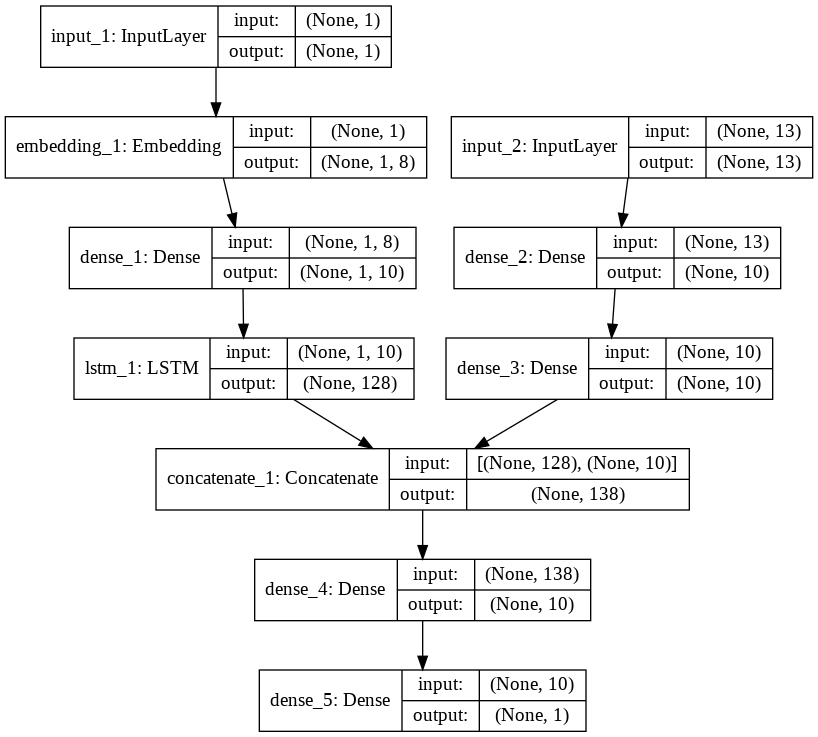

In [64]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [65]:
X1_train

array([[ 1],
       [ 2],
       [ 3],
       ...,
       [10],
       [11],
       [ 0]], dtype=int32)

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
mc = ModelCheckpoint('best_model_100.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [68]:
history = model.fit(x=[X1_train, X2_train], y=y_train, epochs=50, verbose=1, validation_split=0.2, callbacks=[mc])


Train on 17971 samples, validate on 4493 samples
Epoch 1/50
17971/17971 [==============================] - 5s 288us/step - loss: 1.6778 - val_loss: 0.6613

Epoch 00001: val_loss improved from inf to 0.66126, saving model to best_model_100.h5
Epoch 2/50
17971/17971 [==============================] - 4s 197us/step - loss: 1.4675 - val_loss: 0.6979

Epoch 00002: val_loss did not improve from 0.66126
Epoch 3/50
17971/17971 [==============================] - 3s 194us/step - loss: 1.4561 - val_loss: 0.6811

Epoch 00003: val_loss did not improve from 0.66126
Epoch 4/50
17971/17971 [==============================] - 3s 194us/step - loss: 1.5853 - val_loss: 0.6596

Epoch 00004: val_loss improved from 0.66126 to 0.65962, saving model to best_model_100.h5
Epoch 5/50
17971/17971 [==============================] - 3s 190us/step - loss: 1.4535 - val_loss: 0.6569

Epoch 00005: val_loss improved from 0.65962 to 0.65688, saving model to best_model_100.h5
Epoch 6/50
17971/17971 [=======================

In [0]:
from keras.models import load_model

In [71]:
# load the saved model
saved_model = load_model('best_model_100.h5')
saved_model.evaluate([X1_train, X2_train], y_train, verbose=0), saved_model.evaluate([X1_test, X2_test], y_test, verbose=0)

(1.203409913037121, 2.027268204763744)

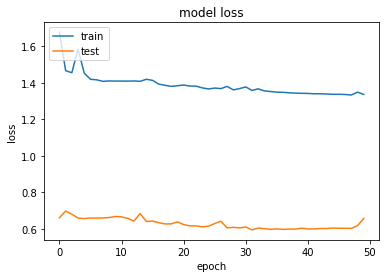

In [72]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()